# Homework Data Visualization

$\textbf{Ubah nama di bawah yaa!}$

- Nama: MUHAMAD FAHMI AMIQ
- Cita-cita semasa kecil: Pemain Sepak Bola

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from textwrap import wrap
import numpy as np

# please import as much as you need

In [2]:
# read your data

df = pd.read_csv('telco_customer.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Normal

## Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint: Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

In [4]:
# your code goes here!
df_nomor_1 = df.groupby(['PaymentMethod'])['MonthlyCharges'].mean().reset_index()
df_nomor_1

,PaymentMethod,MonthlyCharges
0,Bank transfer (automatic),67.192649
1,Credit card (automatic),66.512385
2,Electronic check,76.255814
3,Mailed check,43.917060


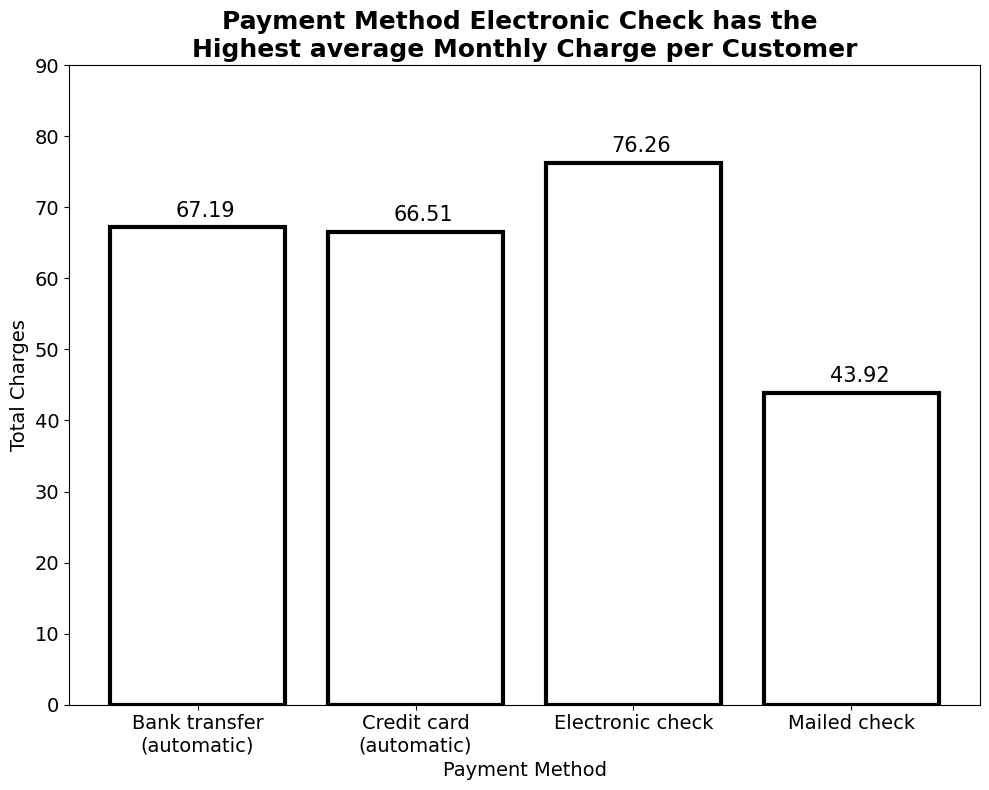

In [5]:
# nentuin luas tanah
fig, ax = plt.subplots(1, 1, figsize=(10,8))

x = df_nomor_1["PaymentMethod"]
y = df_nomor_1["MonthlyCharges"]


ax.bar(x=x, height=y, data=df_nomor_1, 
       color = 'white', # bar colors
       edgecolor= 'black', # edge bar colors
       linewidth = 3) # line width of bar

# dekorasi halaman
ax.set_title('Payment Method Electronic Check has the \nHighest average Monthly Charge per Customer',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Total Charges', fontsize=14) # y axis label
ax.set_xlabel('Payment Method', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

# 
x_numbers = range(len(x))
for i in x_numbers:
    ax.text(x = x_numbers[i]-0.1 , y = y[i]+1.5, s = round(y[i], 2), size = 15) # add data points

label = list(df_nomor_1['PaymentMethod'].unique())
labela = [ '\n'.join(wrap(l, 20)) for l in label]
ticks_loc = ax.get_xticks()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticklabels(labela)
    
ax.set_ylim(0, 90)
plt.tight_layout()

Jadi, dari plot di atas, dapat disimpulkan bahwa... Electronic check memiliki rata-rata biaya bulanan tertinggi per pelanggan sebesar 76.26 dan Mailed check memiliki rata-rata biaya bulanan terendah per pelanggan sebesar 43.92. 

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 bulan
- medium_tenure: User dengan tenure 21 - 40 bulan
- high_tenure: User dengan tenure > 40 bulan

Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

In [6]:
# your code goes here!
df["tenure_group"] = df["tenure"].apply(lambda x: "low_tenure" if x < 21 else\
                                                  "medium_tenure" if x >= 21 and x <= 40 else "high_tenure")

#df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 20, 40, max(dfa['tenure'])], 
#                             labels=['low_tenure', 'medium_tenure', 'high_tenure'], 
#                            include_lowest=True)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,low_tenure
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,medium_tenure
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,low_tenure
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,high_tenure
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,low_tenure


In [7]:
df_nomor_2 = df.groupby(["tenure_group"])["customerID"].nunique().reset_index()
df_nomor_2

,tenure_group,customerID
0,high_tenure,2757
1,low_tenure,2878
2,medium_tenure,1408


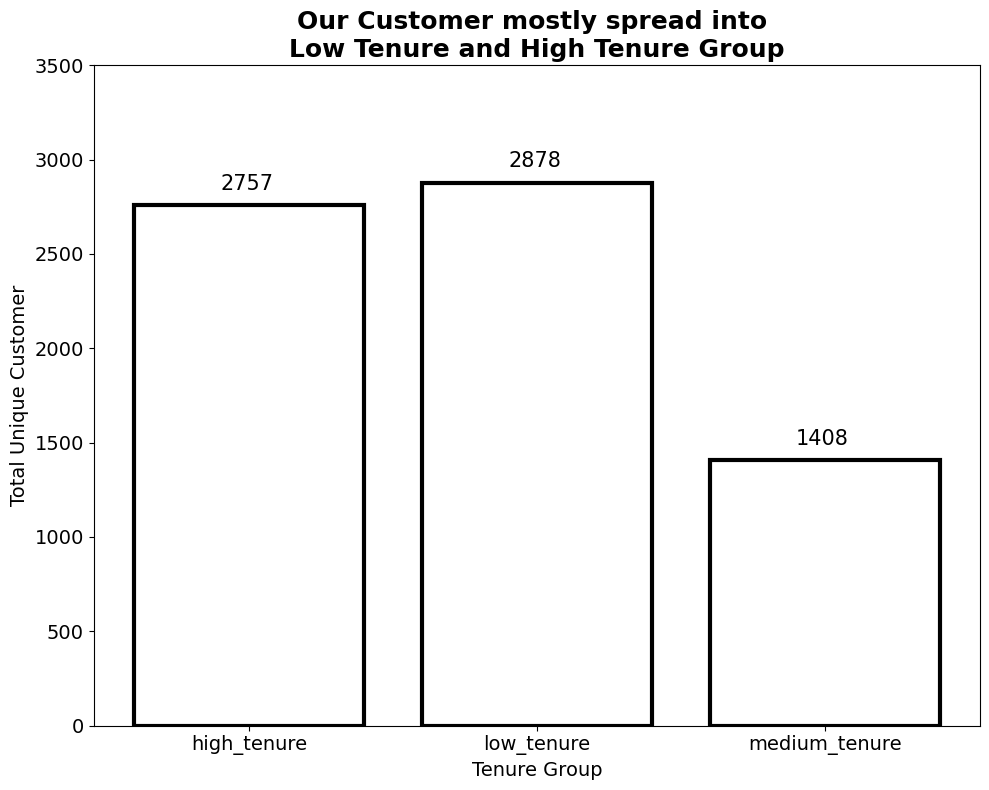

In [8]:
# nentuin luas tanah
fig, ax = plt.subplots(1, 1, figsize=(10,8))

# nentuin bahan bangunan
x = df_nomor_2["tenure_group"]
y = df_nomor_2["customerID"]

# 101 menuju kuli
# bentuk rumah
ax.bar(x=x, height=y, data=df_nomor_1, 
       color = 'white', # bar colors
       edgecolor= 'black', # edge bar colors
       linewidth = 3) # line width of bar

# dekorasi halaman
ax.set_title('Our Customer mostly spread into \nLow Tenure and High Tenure Group',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Total Unique Customer', fontsize=14) # y axis label
ax.set_xlabel('Tenure Group', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

x_numbers = range(len(x))
for i in x_numbers:
    ax.text(x = x_numbers[i]-0.1 , y = y[i]+80, s = round(y[i], 2), size = 15) # add data points
    
ax.set_ylim(0, 3500)
plt.tight_layout()

Jadi, dari plot di atas, kami menyimpulkan bahwa... pelanggan sebagian besar tersebar di grup Low Tenure dan High Tenure karena memiliki selisih yang tinggi begitu jauh. Namun pelanggan paling banyak tersebar di low Tenure Group dan paling sedikit di medium tenure.

## Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?

Hint:
- Dapat menggunakan feature/input parameter hue pada seaborn
- Dalam menghitung jumlah unique customer, jangan lupa perhatikan angka rasio, tidak hanya angka absolutnya



In [9]:
# your code goes here!
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [10]:
# your code goes here!
df_nomor_3 = df.groupby(["SeniorCitizen","PhoneService"])["customerID"].nunique().reset_index()
total = df_nomor_3.groupby('SeniorCitizen').customerID.sum()

df_nomor_3['percentage'] = df_nomor_3.apply(lambda row: row.customerID / total[row.SeniorCitizen] * 100, axis=1)
df_nomor_3

,SeniorCitizen,PhoneService,customerID,percentage
0,0,No,578,9.79495
1,0,Yes,5323,90.20505
2,1,No,104,9.10683
3,1,Yes,1038,90.89317


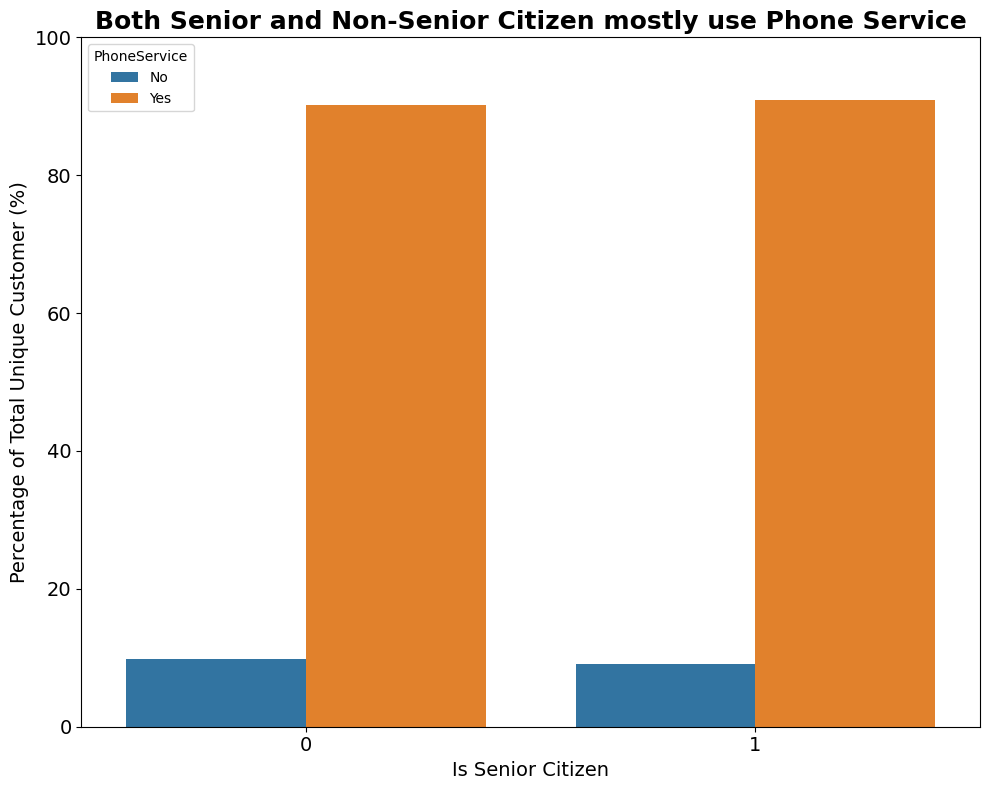

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(x='SeniorCitizen', y='percentage', hue='PhoneService', data=df_nomor_3)

plt.title("Both Senior and Non-Senior Citizen mostly use Phone Service",color='black',fontsize=18,fontweight='bold')
plt.ylabel('Percentage of Total Unique Customer (%)', fontsize=14) # y axis label
plt.xlabel('Is Senior Citizen', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.ylim(0,100)

plt.tight_layout()

Jadi, dari plot di atas, dapat disimpulkan bahwa... Baik warga senior maupun tidak senior, keduanya memiliki persentase yang hampir sama dalam menggunakan layanan telepon yaitu sekitar 90%, artinya Baik warga senior maupun tidak senior mayoritas menggunakan layanan telepon.

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

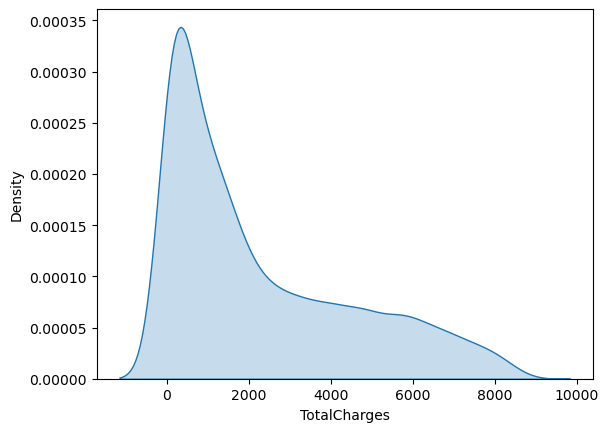

In [12]:
# your code goes here!
df["TotalCharges"] = df["TotalCharges"].apply(lambda x: float(x) if x!= " " else 0)

sns.kdeplot(df["TotalCharges"],fill=True)
plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa... Biaya Total tersebar diantara kurang dari 0 sampai 9000. Namun kebanyakan dari Total harga berkisar antara 0-2000. Dengan frekuensi tertinggi Total harga sekitar 500 (puncak) kemudian frekuensi total harga turun secara drastis sampai angka 2000. Setelah mencapai angka 2000 Total harga turun secara perlahan.

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Intermediate

## Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Hint: dapat ditunjukan melalui distribusi data

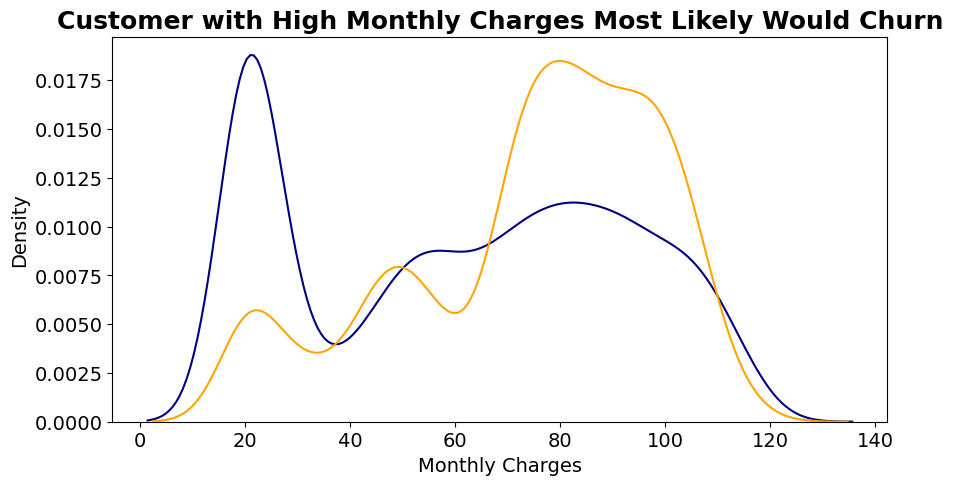

In [13]:
# your code goes here!
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['Churn'] == 'No']['MonthlyCharges'].dropna(), color= 'navy', label= 'Churn: No', ax=ax)
sns.kdeplot(df[df['Churn'] == 'Yes']['MonthlyCharges'].dropna(), color= 'orange', label= 'Churn: Yes', ax=ax)

ax.set_title('Customer with High Monthly Charges Most Likely Would Churn',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Monthly Charges', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

Jadi, dari plot di atas, dapat disimpulkan bahwa... garis warna Navy yang mewakili pengguna yang tidak  Churn kebanyakan dari mereka dikenai biaya bulanan yang rendah sekitar 5-35. Hal ini berarti pengguna yang tidak melakukan Churn memiliki tagihan biaya bulanan yang relatif rendah. Sedangkan garis warna Orange yang mewakili pengguna yang Churn kebanyakan dari mereka dikenai biaya bulanan yang tinggi sekitar 60-110. Hal ini berarti pengguna yang melakukan Churn memiliki tagihan biaya bulanan yang relatif tinggi.

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

Hint: concat partner dan dependents, gunakan parameter 'hue' pada seaborn untuk mempermudah

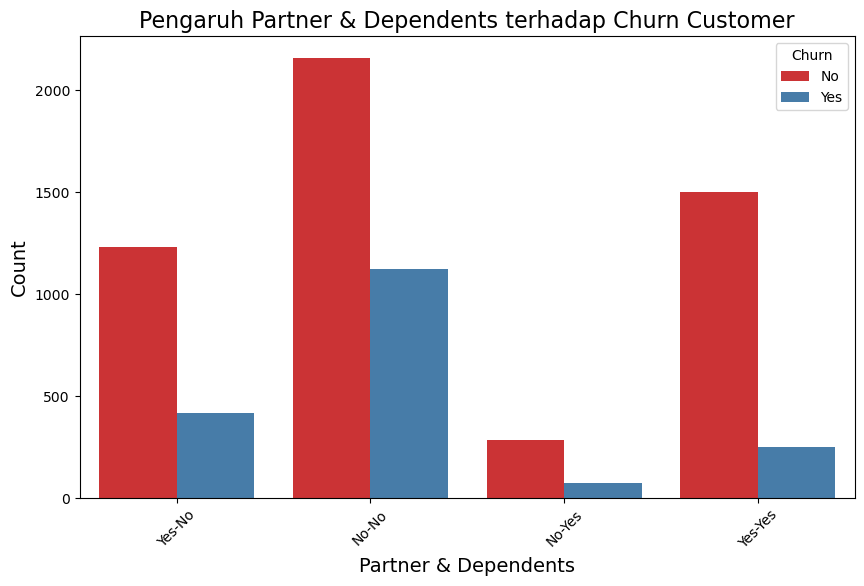

In [14]:
df['Partner_Dependents'] = df['Partner'] + '-' + df['Dependents']

# Buat plot bar dengan parameter 'hue' untuk memisahkan berdasarkan churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Partner_Dependents', hue='Churn', palette='Set1')

plt.title('Pengaruh Partner & Dependents terhadap Churn Customer', fontsize=16)
plt.xlabel('Partner & Dependents', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar terlihat lebih baik
plt.legend(title='Churn', loc='upper right')

# Hapus kolom gabungan
df.drop(columns=['Partner_Dependents'], inplace=True)

plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa... pengguna yang tidak memiliki pasangan namun memiliki tanggungan memiliki tingkat churn yang paling rendah

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Soal Hard

## Buatlah satu insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut! dengan hanya memanfaatkan atribut PaymentMethod, CustomerID, dan Churn!

In [15]:
df_nomor_7 = df.groupby(["tenure","Churn"])["customerID"].nunique().reset_index()
df_nomor_7

,tenure,Churn,customerID
0,0,No,11
1,1,No,233
2,1,Yes,380
3,2,No,115
4,2,Yes,123
...,...,...,...
140,70,Yes,11
141,71,No,164
142,71,Yes,6
143,72,No,356


In [16]:
churn_yes = df_nomor_7[df_nomor_7['Churn'] == 'Yes']
churn_yes

,tenure,Churn,customerID
2,1,Yes,380
4,2,Yes,123
6,3,Yes,94
8,4,Yes,83
10,5,Yes,64
...,...,...,...
136,68,Yes,9
138,69,Yes,8
140,70,Yes,11
142,71,Yes,6


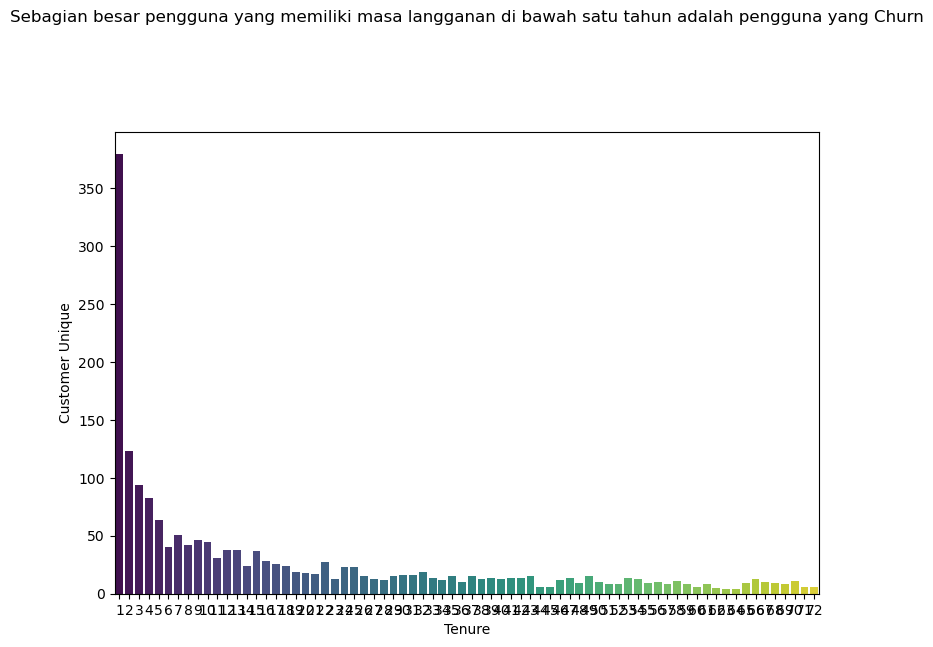

In [17]:
plt.figure(figsize=(20, 6))


plt.subplot(121)
sns.barplot(x='tenure', y='customerID', data=churn_yes, palette='viridis')
plt.xlabel('Tenure')
plt.ylabel('Customer Unique')
plt.title('')

plt.text(0.5, 1.2, 'Sebagian besar pengguna yang memiliki masa langganan di bawah satu tahun adalah pengguna yang Churn\n',
         fontsize=12, ha='center', transform=plt.gca().transAxes)
plt.show()

In [18]:
# Menghitung jumlah pelanggan unik berdasarkan kombinasi Contract, Partner, dan gender
df_contract = df.groupby(['Contract', 'Churn', 'Partner'])['customerID'].nunique().reset_index()
df_contract


,Contract,Churn,Partner,customerID
0,Month-to-month,No,No,1380
1,Month-to-month,No,Yes,840
2,Month-to-month,Yes,No,1115
3,Month-to-month,Yes,Yes,540
4,One year,No,No,575
5,One year,No,Yes,732
6,One year,Yes,No,68
7,One year,Yes,Yes,98
8,Two year,No,No,486
9,Two year,No,Yes,1161


In [19]:
churn_ya = df_contract[df_contract['Churn'] == 'Yes']
churn_ya

,Contract,Churn,Partner,customerID
2,Month-to-month,Yes,No,1115
3,Month-to-month,Yes,Yes,540
6,One year,Yes,No,68
7,One year,Yes,Yes,98
10,Two year,Yes,No,17
11,Two year,Yes,Yes,31


In [20]:
churn_ya.rename(columns={'Partner': 'Status'}, inplace=True)
churn_ya

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13892\2531172037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_ya.rename(columns={'Partner': 'Status'}, inplace=True)


,Contract,Churn,Status,customerID
2,Month-to-month,Yes,No,1115
3,Month-to-month,Yes,Yes,540
6,One year,Yes,No,68
7,One year,Yes,Yes,98
10,Two year,Yes,No,17
11,Two year,Yes,Yes,31


In [21]:
churn_ya['Status'] = churn_ya['Status'].replace({'Yes': 'Married', 'No': 'Single'})
churn_ya

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13892\660590509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_ya['Status'] = churn_ya['Status'].replace({'Yes': 'Married', 'No': 'Single'})


,Contract,Churn,Status,customerID
2,Month-to-month,Yes,Single,1115
3,Month-to-month,Yes,Married,540
6,One year,Yes,Single,68
7,One year,Yes,Married,98
10,Two year,Yes,Single,17
11,Two year,Yes,Married,31


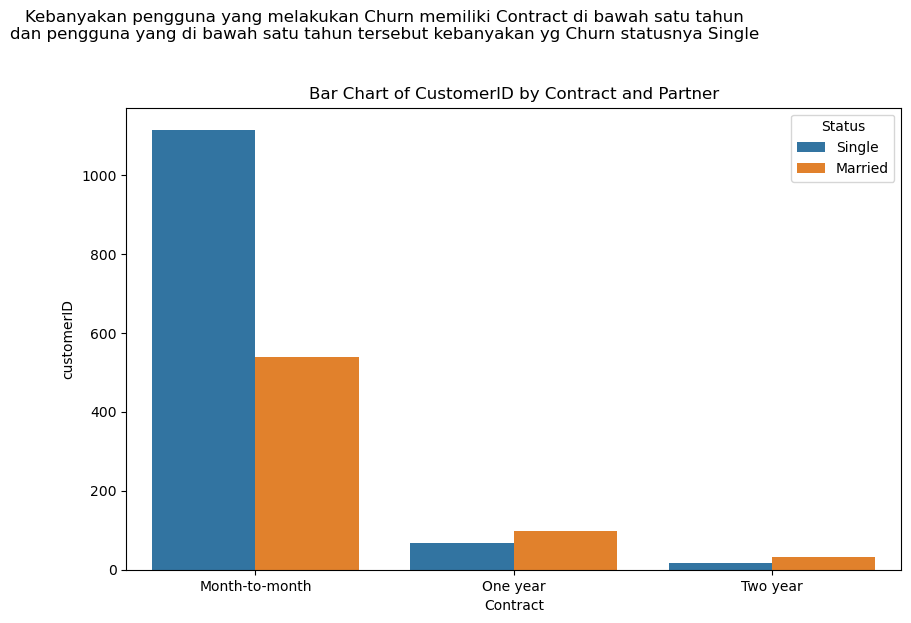

In [22]:
plt.figure(figsize=(10, 6))

plt.text(0.5, 1300.05, 'Kebanyakan pengguna yang melakukan Churn memiliki Contract di bawah satu tahun\n'
                    'dan pengguna yang di bawah satu tahun tersebut kebanyakan yg Churn statusnya Single\n',
         fontsize=12, ha='center')

df['Partner'] = df['Partner'].replace({'Yes': 'Married', 'No': 'Single'})
sns.barplot(x='Contract', y='customerID', hue='Status', data=churn_ya)

# Menambahkan judul dan label sumbu
plt.title('Bar Chart of CustomerID by Contract and Partner')
plt.xlabel('Contract')
plt.ylabel('customerID')

plt.show()

In [23]:
df['Partner'] = df['Partner'].replace({'Married': 'Yes', 'Single': 'No'})
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,low_tenure
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,medium_tenure
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,low_tenure
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,high_tenure
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,low_tenure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,medium_tenure
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,high_tenure
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,low_tenure
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,low_tenure


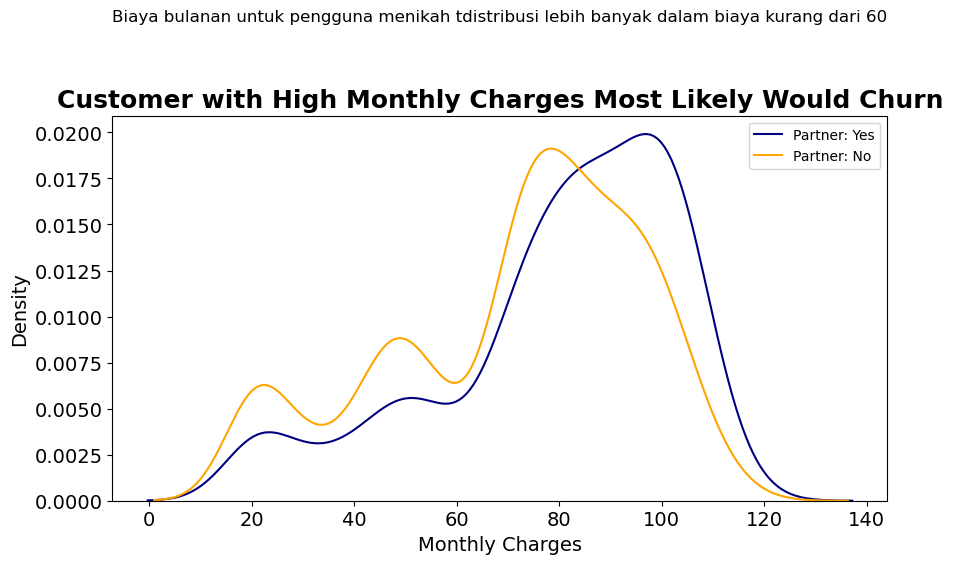

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[(df['Churn'] == 'Yes') & (df['Partner'] == 'Yes')]['MonthlyCharges'].dropna(), color='navy', label='Partner: Yes', ax=ax)
sns.kdeplot(df[(df['Churn'] == 'Yes') & (df['Partner'] == 'No')]['MonthlyCharges'].dropna(), color='orange', label='Partner: No', ax=ax)

ax.set_title('Customer with High Monthly Charges Most Likely Would Churn', color='black', fontsize=18, fontweight='bold')
ax.set_ylabel('Density', fontsize=14)  # y axis label
ax.set_xlabel('Monthly Charges', fontsize=14)  # x axis label

ax.text(0.5, 1.2, 'Biaya bulanan untuk pengguna menikah tdistribusi lebih banyak dalam biaya kurang dari 60\n',
         fontsize=12, ha='center', transform=ax.transAxes)

plt.tick_params(axis='both', which='major', labelsize=14)

plt.legend()
plt.show()